In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

C:\Users\Pablo GDT\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pablo GDT\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Pablo GDT\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = [3.25, 61.23,8.8,178.96
,2.2,45.64,
2.71,47.22,
11,200,
6.22,113.85,
10.28,199.85,
7.22,131.77,
5.58,110.72,
1,20]
X=data[::2]
X=np.array([X]).T
y=data[1::2]
y=np.array([y]).T
print(X)
print(y)


X= np.hstack((np.ones(shape=(len(X), 1)), X))
print(X)

[[ 3.25]
 [ 8.8 ]
 [ 2.2 ]
 [ 2.71]
 [11.  ]
 [ 6.22]
 [10.28]
 [ 7.22]
 [ 5.58]
 [ 1.  ]]
[[ 61.23]
 [178.96]
 [ 45.64]
 [ 47.22]
 [200.  ]
 [113.85]
 [199.85]
 [131.77]
 [110.72]
 [ 20.  ]]
[[ 1.    3.25]
 [ 1.    8.8 ]
 [ 1.    2.2 ]
 [ 1.    2.71]
 [ 1.   11.  ]
 [ 1.    6.22]
 [ 1.   10.28]
 [ 1.    7.22]
 [ 1.    5.58]
 [ 1.    1.  ]]


In [3]:
ls = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(ls)

[[ 0.54262742]
 [18.94633927]]


In [19]:
total=0
y_pred = X.dot(ls)
for i in range(len(X)):
    print(y[i]-y_pred[i])
    total += abs(float(y[i]-y_pred[i]))
MAE=total/len(X)
print(total)
print(MAE)

[-0.88823004]
[11.68958701]
[3.41542619]
[-4.66720684]
[-8.95235938]
[-4.53885767]
[4.5390049]
[-5.56519694]
[4.45679946]
[0.51103331]
49.22370174347782
4.9223701743477815


   x1  x2  class
1  -3  -4     -1
2  -2  -3     -1
0   4   4      1
3   2  -4      1
4   1   3      1
5  -4   2      1


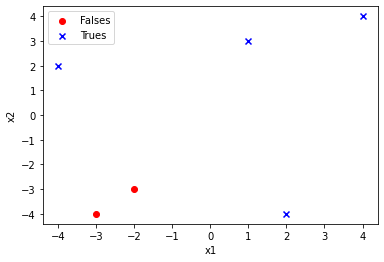

In [9]:
d={'x1': [4, -3,-2,2,1,-4], 'x2': [4,-4,-3,-4,3,2], 'class': [1,-1,-1,1,1,1]}

df = pd.DataFrame(d)
y=df.iloc[:,2].values
X=np.array(df.iloc[:,[0,1]])
sortedDf =df
sortedDf.sort_values(by="class",inplace=True,ascending=True)


%matplotlib inline
# print(X)
# print(df)
print(sortedDf)
plt.scatter(sortedDf.iloc[0:2, 0],sortedDf.iloc[0:2, 1], c='r', marker='o',label='Falses' )
plt.scatter(sortedDf.iloc[2:, 0],sortedDf.iloc[2:, 1], c='b', marker='x', label='Trues')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

In [10]:
w = [0, 0]
print(X)
#print(w.shape)
for t in range(40):
    num_errors = 0
    for xi, label in zip(X, y):
        dp = np.dot(xi, w)
        
        if dp > 0.0:
            prediction = 1
        else:
            prediction = -1
        
        if prediction == 1 and label != 1:
            w -= xi
            num_errors += 1
        elif prediction == -1 and label != -1:
            w += xi
            num_errors += 1
            
    print("Iteration %i - Num.errors: %i - Weights: [%f %f]" % (t, num_errors, w[0], w[1]))

[[ 4  4]
 [-3 -4]
 [-2 -3]
 [ 2 -4]
 [ 1  3]
 [-4  2]]
Iteration 0 - Num.errors: 3 - Weights: [2.000000 2.000000]
Iteration 1 - Num.errors: 3 - Weights: [1.000000 3.000000]
Iteration 2 - Num.errors: 3 - Weights: [0.000000 4.000000]
Iteration 3 - Num.errors: 2 - Weights: [-2.000000 2.000000]
Iteration 4 - Num.errors: 3 - Weights: [0.000000 4.000000]
Iteration 5 - Num.errors: 2 - Weights: [-2.000000 2.000000]
Iteration 6 - Num.errors: 3 - Weights: [0.000000 4.000000]
Iteration 7 - Num.errors: 2 - Weights: [-2.000000 2.000000]
Iteration 8 - Num.errors: 3 - Weights: [0.000000 4.000000]
Iteration 9 - Num.errors: 2 - Weights: [-2.000000 2.000000]
Iteration 10 - Num.errors: 3 - Weights: [0.000000 4.000000]
Iteration 11 - Num.errors: 2 - Weights: [-2.000000 2.000000]
Iteration 12 - Num.errors: 3 - Weights: [0.000000 4.000000]
Iteration 13 - Num.errors: 2 - Weights: [-2.000000 2.000000]
Iteration 14 - Num.errors: 3 - Weights: [0.000000 4.000000]
Iteration 15 - Num.errors: 2 - Weights: [-2.00000

    x   y
0   1   1
1   2   2
2   3   1
3   5   6
4   6   8
5   8   5
6   8   8
7  12  10


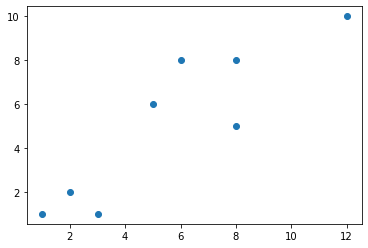

In [8]:
d2={'x':[1,2,3,5,6,8,8,12], 'y':[1,2,1,6,8,5,8,10]}
df=pd.DataFrame(d2)
print(df)
X = df.iloc[:, :2].values
x1=df.iloc[:,0]
x2=df.iloc[:,1]
plt.scatter(x1,x2)


[[ 1  1]
 [12 10]]


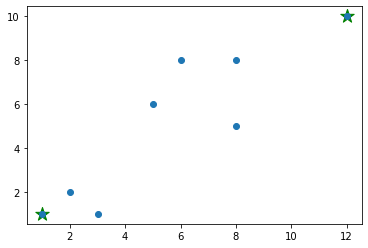

In [146]:
k = 2
centroids = [[1,1],[12,10]]

centroids = np.array(centroids)
print(centroids)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c='green')
plt.scatter(x1,x2)

In [147]:
clusters = np.zeros(len(X))
prev_clusters = None
c=0
while True:
    
    for i in range(len(X)):
        lowest_dist = np.inf
        for j in range(k):
            dist = np.linalg.norm(X[i] - centroids[j], ord=2)
            if dist < lowest_dist:
                lowest_dist = dist
                best_cluster = j
            
        clusters[i] = best_cluster
    
    k_points = []
    for i in range(k):
        k_points.append([])
    
    for i in range(len(X)):
        k_points[int(clusters[i])].append(X[i])
    
    for i in range(k):
        centroids[i] = np.mean(k_points[i], axis=0)
        
    print(centroids)
    converged = (clusters==prev_clusters).all()
    print("Converged? "+str(converged))
    if converged:
        break
    
    prev_clusters = np.copy(clusters)


[[2 2]
 [8 7]]
Converged? False
[[2 1]
 [7 7]]
Converged? False
[[2 1]
 [7 7]]
Converged? True
